<a href="https://colab.research.google.com/github/Reenook/Python-AI-Projects/blob/main/Financial_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from adtk.data import validate_series
from adtk.detector import *
from adtk.visualization import plot

import seaborn as sns


install this before importing the library in colab

adtk library=https://adtk.readthedocs.io/en/stable/

In [2]:
!pip install adtk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00


In [4]:
!pip install yfinance

In [15]:
data=yf.download("TSLA")['Close']

[*********************100%***********************]  1 of 1 completed


must validate data for adtk

In [16]:
data = data.dropna()
data = validate_series(data)

In [19]:
persist_detector = PersistAD(window=5, side='both')
anomalies = persist_detector.fit_detect(data)

/usr/local/lib/python3.11/dist-packages/adtk/detector/_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
/usr/local/lib/python3.11/dist-packages/adtk/detector/_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
/usr/local/lib/python3.11/dist-packages/adtk/aggregator/_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[predicted & lists.isna().any(axis=1)] = 

**PersistAD= This detector finds moments when the value stays the same for too long.
Think of a line that goes flat when it shouldn't like a stuck sensor or a frozen stock price**

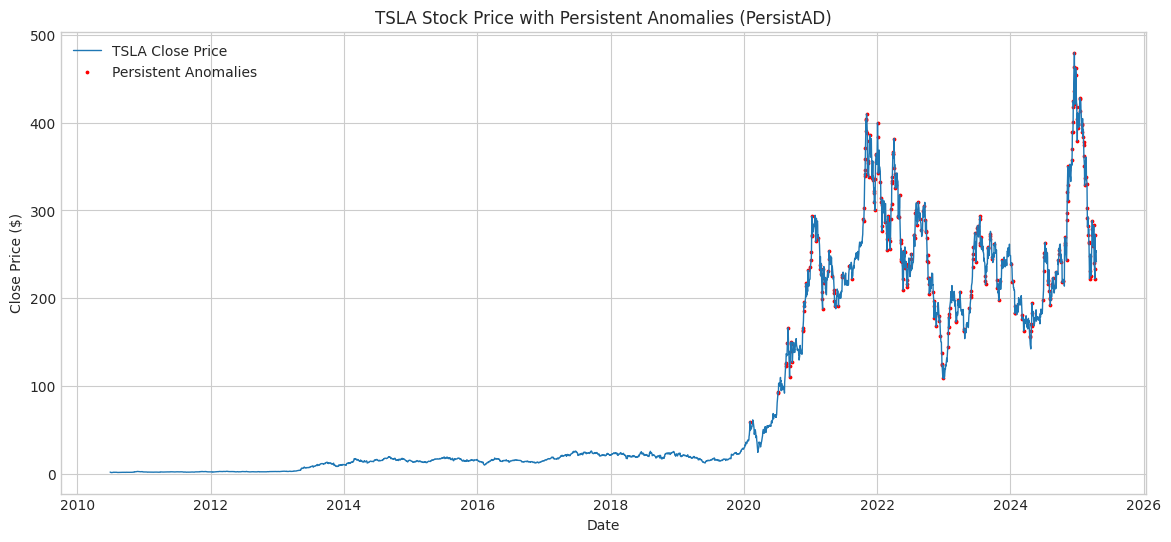

In [21]:
plt.figure(figsize=(14,6))
plt.plot(data, label='TSLA Close Price', linewidth=1)


anomaly_points = data[anomalies == True]
plt.scatter(anomaly_points.index, anomaly_points, color='red', label='Persistent Anomalies', s=3)


plt.title('TSLA Stock Price with Persistent Anomalies (PersistAD)')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(True)

plt.show()

**VolatilityShiftAD= This one looks for sudden changes in how much the values bounce up and down.
It spots when things suddenly get way more shaky or unusually calm.**

In [32]:
volatility_detector = VolatilityShiftAD(window=10, c=3.0)

In [23]:
anomalies = volatility_detector.fit_detect(data)

/usr/local/lib/python3.11/dist-packages/adtk/detector/_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
/usr/local/lib/python3.11/dist-packages/adtk/detector/_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
/usr/local/lib/python3.11/dist-packages/adtk/aggregator/_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[predicted & lists.isna().any(axis=1)] = 

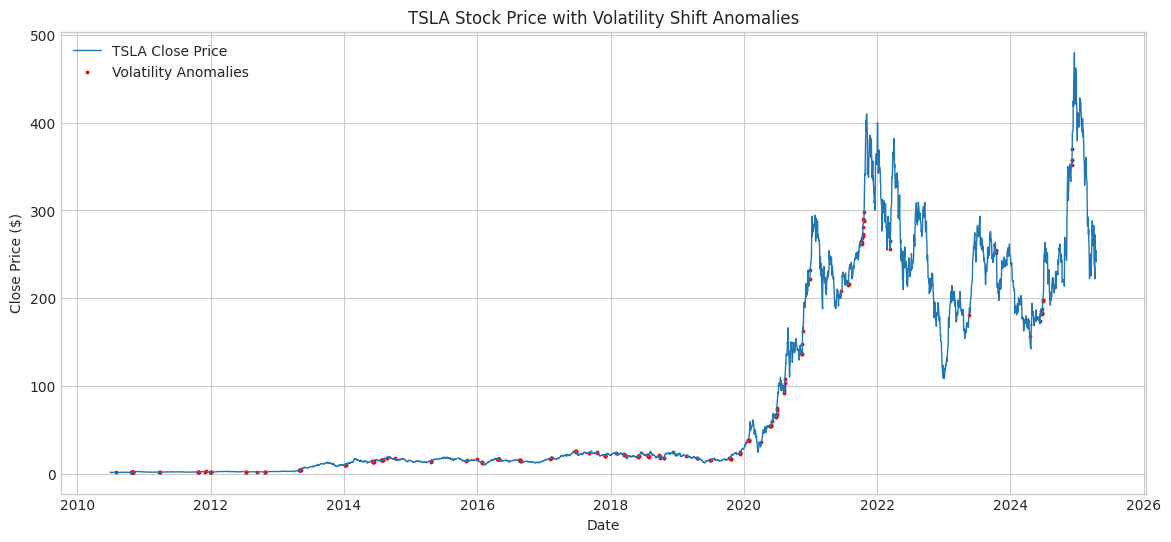

In [30]:
plt.figure(figsize=(14,6))
plt.plot(data, label='TSLA Close Price', linewidth=1)


anomaly_points = data[anomalies == True]
plt.scatter(anomaly_points.index, anomaly_points, color='red', label='Volatility Anomalies', s=3)


plt.title('TSLA Stock Price with Volatility Shift Anomalies')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(True)
plt.show()